In [1]:
from modules import *

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
# Resolutions to save data as.
resolutions = [1]

# temporal averages
temporal_resolution = ['monthly', 'seasonal', 'annual']
temporal_resolution = ['annual']

# temporal_breakdown
temporal_decomposition = ['raw', 'anomalous']
temporal_decomposition = ['anomalous']

# detrending
# detrend = ['raw', 'detrended']
detrend = ['raw']
subindicies_list = [
#                     ['SAM'],
#                     ['IPO'],
#                     ['DMI'],
#                     ['nina34'],
#                     ['SOI'],
#                     ['meiv2'],
                    ['SAM','IPO','DMI','SOI'],
                   ]

In [3]:
# p2.individual_main_stacked(subindicies_list, resolutions, temporal_resolution,temporal_decomposition,detrend)

In [4]:
# w2.analyse_variable(temporal_resolution,temporal_decomposition,detrend, 'pressure', subindicies_list[-1])
# pressure_stats = p2.get_stats(subindicies_list[-1:], resolutions, temporal_resolution,temporal_decomposition,detrend, variable = 'pressure')

In [5]:
# w2.analyse_variable(temporal_resolution,temporal_decomposition,detrend, 't2m', subindicies_list[-1])
# temp_stats = p2.get_stats(subindicies_list[-1:], resolutions, temporal_resolution,temporal_decomposition,detrend, variable = 't2m')

Finding coefficients


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:08<00:00, 12742.51it/s]


Predicting SIC


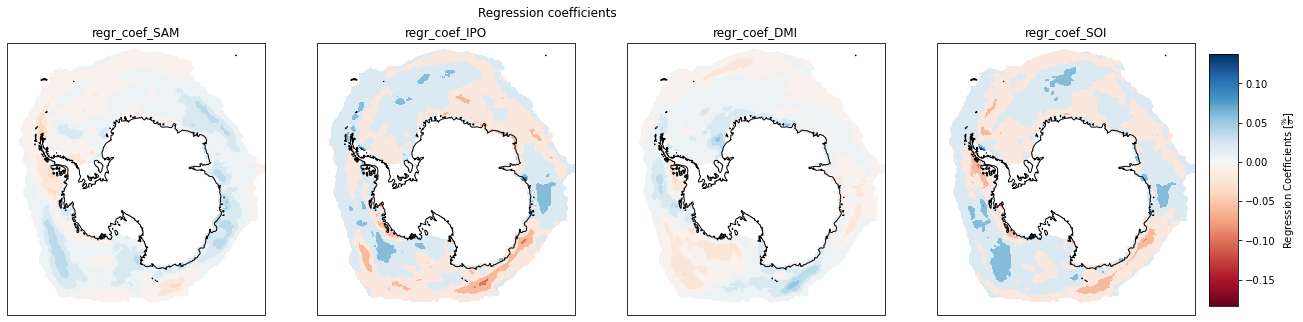

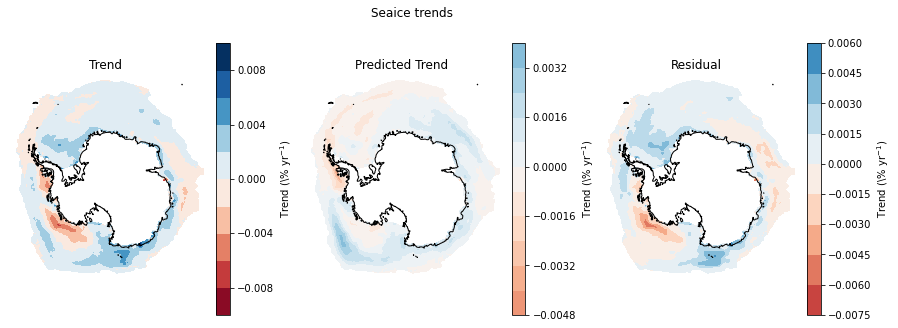

findfont: Font family ['computer modern'] not found. Falling back to DejaVu Sans.
findfont: Font family ['computer modern'] not found. Falling back to DejaVu Sans.


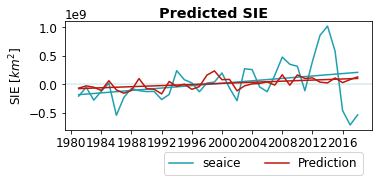

findfont: Font family ['computer modern'] not found. Falling back to DejaVu Sans.


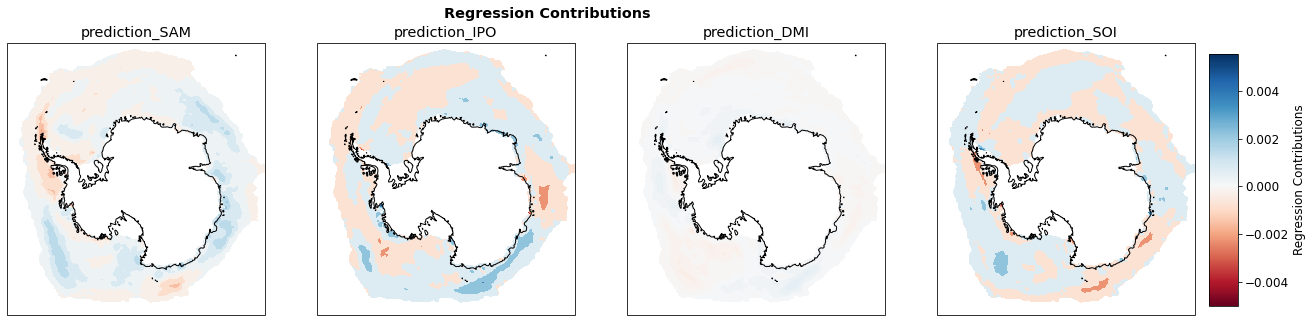

In [6]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
regression_results, results, individual_results = w3.regress(independant              = subindicies_list[0], 
                                                               dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                               temporal_resolution    = 'annual',
                                                               temporal_decomposition = 'anomalous',
                                                               detrend                = 'raw',
                                                               do_plotting            = True,
                                                               get_stats              = False,
                                                               individual_stats       = False)

In [13]:
# results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\index_stats_0.tex')
results.transpose()

spatial_correlation           0.567
temporal_correlation          0.273
Predicted_Trend         4832512.854
Actual_Trend           10613258.938
dtype: float64

In [14]:
individual_results = individual_results.sort_values('individual_Predicted_Trend', ascending=False)
# individual_results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\index_stats_1.tex')
individual_results.transpose()

,SAM,IPO,SOI,DMI
individual_spatial_correlation,0.558,0.535,0.469,0.333
individual_temporal_correlation,0.279,0.169,0.143,0.022
individual_Actual_Trend,10663385.087,10663385.087,10663385.087,10613258.938
individual_Predicted_Trend,3879056.077,1730834.999,1170423.018,92678.084
spatial_correlation,0.367,0.421,-0.156,0.432
temporal_correlation,0.235,0.156,-0.140,0.022
Actual_Trend,10613258.938,10613258.938,10613258.938,10613258.938
Predicted_Trend,3185092.541,1627791.513,-136134.245,155763.045


In [15]:
regression_results

<xarray.Dataset>
Dimensions:          (time: 38, x: 316, y: 332)
Coordinates:
  * time             (time) datetime64[ns] 1981-01-01 1982-01-01 ... 2018-01-01
  * x                (x) int32 -3950000 -3925000 -3900000 ... 3900000 3925000
  * y                (y) int32 4350000 4325000 4300000 ... -3900000 -3925000
Data variables:
    SAM              (x, y, time) float64 -0.81 0.2061 0.2731 ... 0.4541 0.7999
    IPO              (x, y, time) float64 -0.06866 1.463 ... -0.5747 -0.8241
    DMI              (x, y, time) float64 -0.8856 1.111 -0.2242 ... 0.7318 1.119
    SOI              (x, y, time) float64 0.383 -1.609 -1.365 ... 0.5753 0.4092
    seaice           (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction       (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_SAM    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    regr_coef_IPO    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    regr_coef_DMI    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    regr_coef_SOI    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    regr_coef_error  (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    prediction_SAM   (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_IPO   (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_DMI   (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    prediction_SOI   (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [ ]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
variable_regression_results, variable_results, variable_individual_results = w3.regress(independant              = ['t2m','u10', 'v10', 'si10', 'sp'], 
                                                                                        dependant                = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                                        temporal_resolution      = 'annual',
                                                                                        temporal_decomposition   = 'anomalous',
                                                                                        detrend                  = 'raw',
                                                                                        do_plotting              = True,
                                                                                        get_stats                = True,
                                                                                        individual_stats         = True)

In [ ]:
variable_regression_results

In [ ]:
variable_results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\variable_stats_0.tex')
variable_results.transpose()

In [ ]:
variable_individual_results = variable_individual_results.sort_values('individual_Predicted_Trend', ascending=False)
variable_individual_results.transpose().to_latex('..\..\Masters Documents\Week 3 Results\\variable_stats_1.tex')
variable_individual_results.transpose()

In [ ]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['ssr', 'ssrd'], 
                                                                           dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = True,
                                                                            individual_stats      = True)

In [ ]:
temp_results

In [ ]:
import xarray as xr
file = 'download.nc'
data = xr.open_dataset(file)

In [ ]:
data

In [8]:
import numpy as np
from pyproj import Proj, transform
import xarray as xr
file = 'download.nc'
data = xr.open_dataset(file, chunks={'time':100}).sel(expver=1)
for variable in data:
    print(variable)
    subdata = data[variable]
    Y, X = [10*np.arange(435000,-395000,-2500),
            10*np.arange(-395000,395000,2500)]
    x,y = np.meshgrid(X,Y)
    inProj = Proj(init='epsg:3031')
    outProj = Proj(init='epsg:4326')
    x,y = transform(inProj,outProj,x,y)
    x = x.flatten()
    y = y.flatten()
    x[x<0] = x[x<0]+360 
    x = xr.DataArray(x, dims='z')
    y = xr.DataArray(y, dims='z')
    variable_data = subdata.interp(longitude=x, latitude=y, method = 'linear', kwargs={"fill_value": 0.0})
    interpolated = variable_data.values.reshape([subdata.time.size,len(Y),len(X)])
    dims_ = ['time','y','x']

    interpolated = xr.DataArray(data = interpolated, dims=dims_,coords = [data.time,Y,X])
    
    interpolated.to_netcdf(f'download/{variable}_transformed.nc')
    print(f'{variable} processed')

u10
u10 processed
v10
v10 processed
si10
si10 processed
t2m
t2m processed
sst
sst processed
skt
skt processed
ssr
ssr processed
sp
sp processed
ssrd
ssrd processed


In [ ]:
for index in subindicies_list[0]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
    regression_results, results, individual_results = w3.regress(independant              = [index], 
                                                                   dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                   temporal_resolution    = 'annual',
                                                                   temporal_decomposition = 'anomalous',
                                                                   detrend                = 'raw',
                                                                   do_plotting            = True,
                                                                   get_stats              = True,
                                                                   individual_stats       = False)
    print(results)

In [ ]:
# variables implemented = 'IPO','nina34','nina12','DMI','SAM','meiv2','SOI','SAM' 
# u10 v10 si10 t2m sst skt ssr sp ssrd
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','IPO','DMI','SOI','nina34'], 
                                                                           dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','meiv2','DMI','SOI','nina34'], 
                                                                           dependant              = 'seaice',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)


In [ ]:
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','meiv2','DMI','SOI','nina34'], 
                                                                           dependant              = 't2m',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)
temp_regression_results, temp_results, temp_individual_results = w3.regress(independant           = ['SAM','IPO','DMI','SOI','nina34'], 
                                                                           dependant              = 't2m',    # Needs to have spatial dimension (so not an index)
                                                                           temporal_resolution    = 'annual',
                                                                           temporal_decomposition = 'anomalous',
                                                                           detrend                = 'raw',
                                                                            do_plotting           = True,
                                                                            get_stats             = False,
                                                                            individual_stats      = False)

In [3]:
import numpy as np
from pyproj import Proj, transform
import xarray as xr
from tqdm import tqdm
import itertools
import scipy

Y, X = [10*np.arange(435000,-395000,-2500),
        10*np.arange(-395000,395000,2500)]
x,y = np.meshgrid(X,Y)
inProj = Proj(init='epsg:3031')
outProj = Proj(init='epsg:4326')
x,y = transform(inProj,outProj,x,y)
x = x.flatten()
y = y.flatten()
x[x<0] = x[x<0]+360 
x = xr.DataArray(x, dims='z')
y = xr.DataArray(y, dims='z')

In [5]:
from glob import glob
files = glob('new_data/*')
for file in files:
    data = xr.open_dataset(file)
    data = data.sel(latitude=slice(-40,-90)).sel(expver=1)
    print(data)
    variable = [v for v in data][0]
    if 'level' in data.dims:
        dims_ = ['time','y','x','level']
        newdata = xr.DataArray(dims=dims_,coords = [data.time,Y,X, data.level])
    else:
        dims_ = ['time','y','x']
        newdata = xr.DataArray(dims=dims_,coords = [data.time,Y,X])
#     for time in tqdm(data.time.values):
    subdata = data[variable]
    variable_data = subdata.interp(longitude=x, latitude=y, method = 'linear', kwargs={"fill_value": 0.0})
    if 'level' in data.dims:
        newdata.data = variable_data.values.reshape([len(data.time),len(Y),len(X),3])
    else:
        newdata.data = variable_data.values.reshape([len(data.time),len(Y),len(X)])
    newdata.name = variable
    newdata.attrs = data[variable].attrs
    newdata.to_netcdf(f'processed_data/ERA5-levels/{variable}.nc')
    print(f'{variable} processed')

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 1440, time: 501)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 -40.0 -40.25 -40.5 ... -89.5 -89.75 -90.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-10 20:43:35 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
u10 processed
<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 1440, time: 501)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 -40.0 -40.25 -40.5 ... -89.5 -89.75 -90.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-09-01
Data variables:
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history

In [ ]:
newdata